In [2]:
import pandas
import px4tools
import pylab as pl
%matplotlib inline
%load_ext autoreload
%autoreload 2
pl.rcParams['figure.figsize'] = (15,5)
pl.rcParams['lines.linewidth'] = 3

# Data Sets

In [3]:
data = px4tools.project_lat_lon(px4tools.process_data(pandas.read_csv('log/05_40_17.csv')))

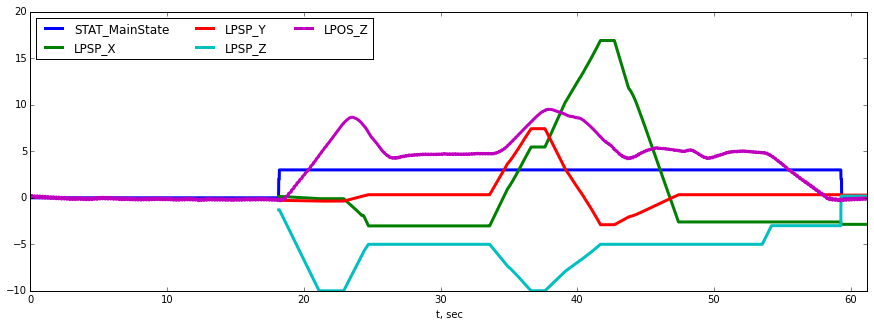

In [4]:
data.STAT_MainState.plot()
data.LPSP_X.plot()
data.LPSP_Y.plot()
data.LPSP_Z.plot()
(-data.LPOS_Z).plot()
pl.legend(loc='best', ncol=3)

In [10]:
data_ground = data[0:10]

{'DIST_Distance_dt': 0,
 'DIST_Distance_mean': 0,
 'DIST_Distance_noise_power': 0,
 'DIST_Distance_stddev': 0,
 'DIST_Distance_variance': 0,
 'GPS_VelD_dt': 0.19974225000000001,
 'GPS_VelD_mean': -0.0042857142896991825,
 'GPS_VelD_noise_power': 0.00036327292024094024,
 'GPS_VelD_stddev': 0.042646318267052806,
 'GPS_VelD_variance': 0.0018187084617347618,
 'GPS_VelE_dt': 0.19974225000000001,
 'GPS_VelE_mean': -0.00624489810374551,
 'GPS_VelE_noise_power': 0.00010248884387321704,
 'GPS_VelE_stddev': 0.022651831803601797,
 'GPS_VelE_variance': 0.00051310548405866579,
 'GPS_VelN_dt': 0.19566587755102041,
 'GPS_VelN_mean': -0.0016000003041679999,
 'GPS_VelN_noise_power': 0.00014839461410807823,
 'GPS_VelN_stddev': 0.027539212796746811,
 'GPS_VelN_variance': 0.00075840824146450336,
 'GPS_X_dt': 0.29053418181818186,
 'GPS_X_mean': -0.040166656293174494,
 'GPS_X_noise_power': 5.2140796111805472e-05,
 'GPS_X_stddev': 0.013396464925653752,
 'GPS_X_variance': 0.00017946527250427117,
 'GPS_Y_dt': 0

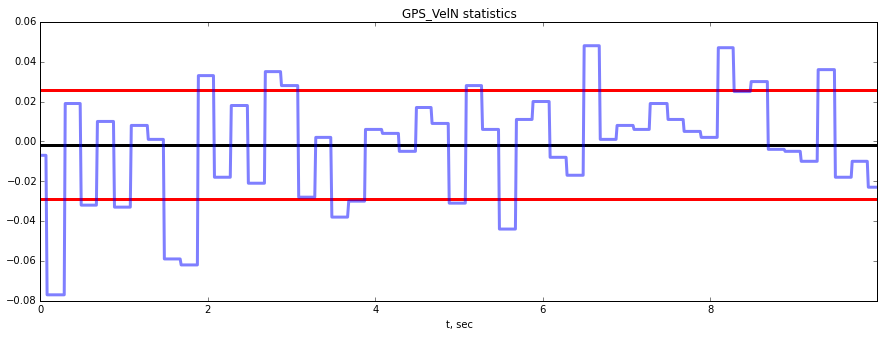

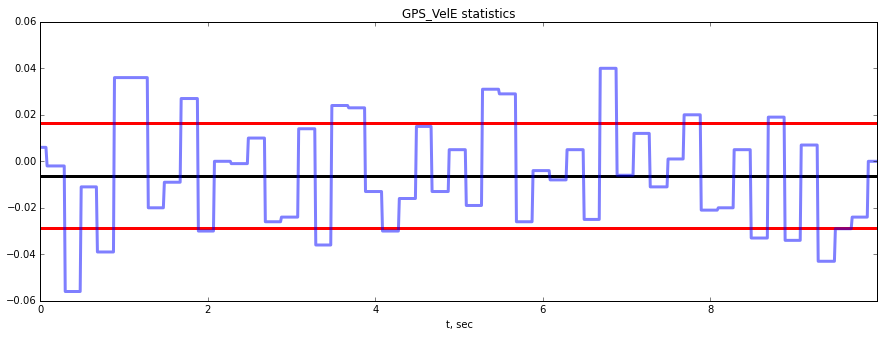

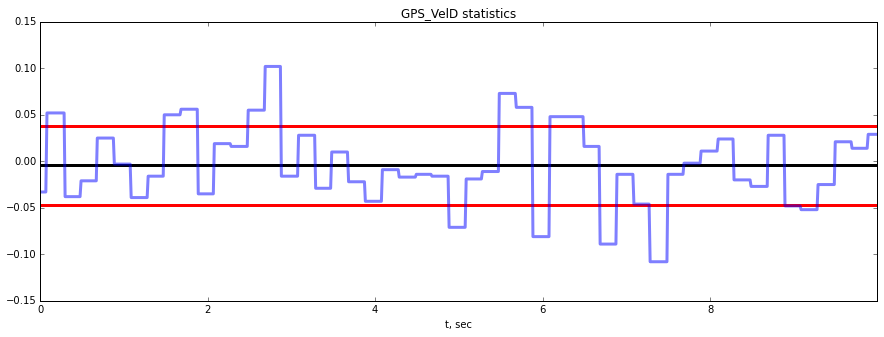

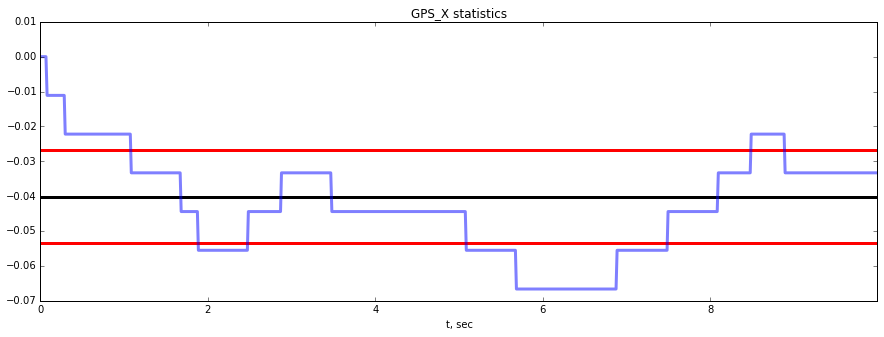

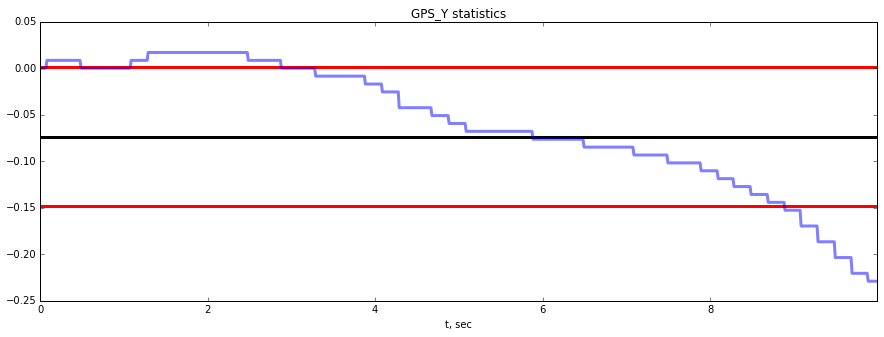

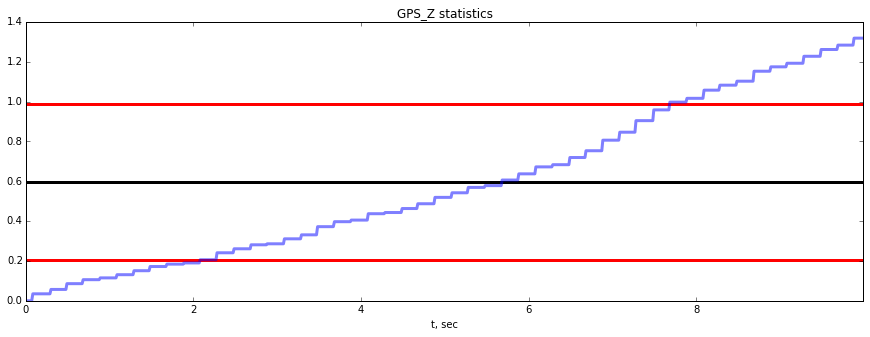

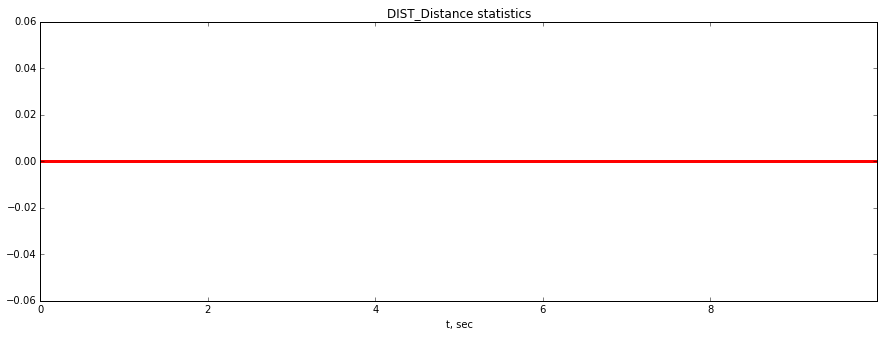

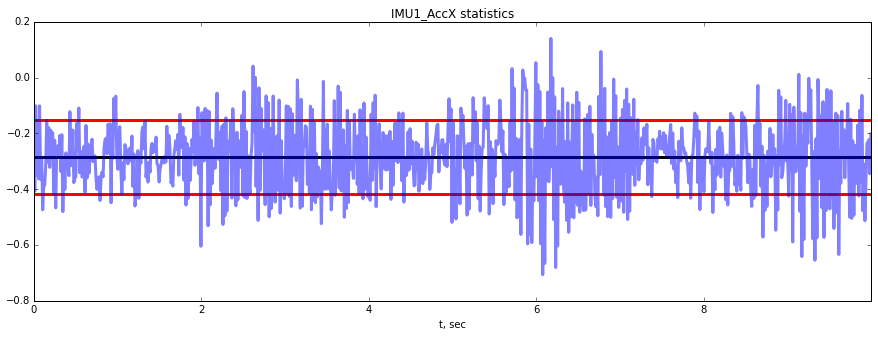

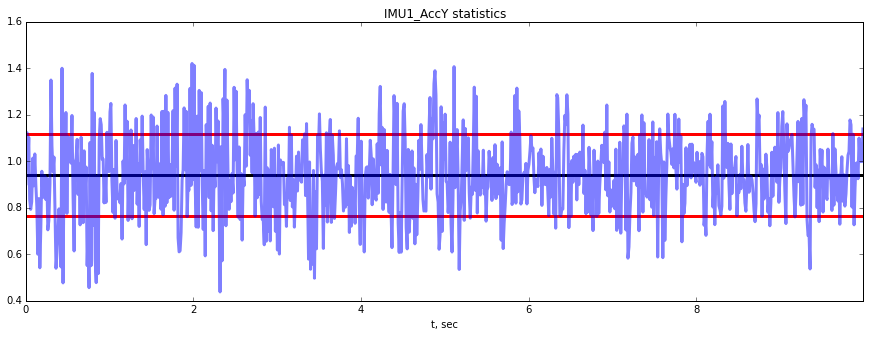

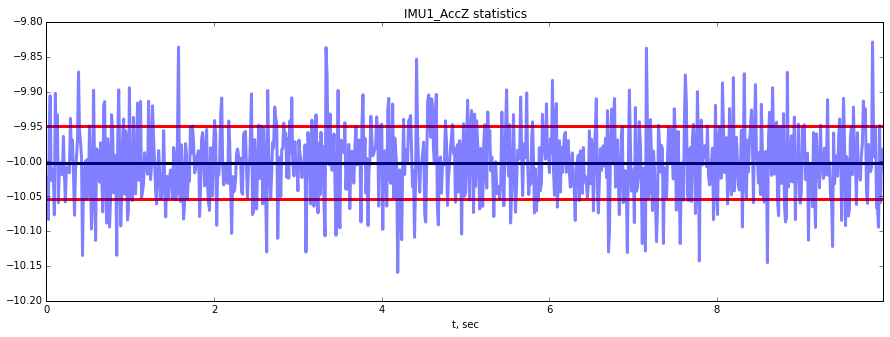

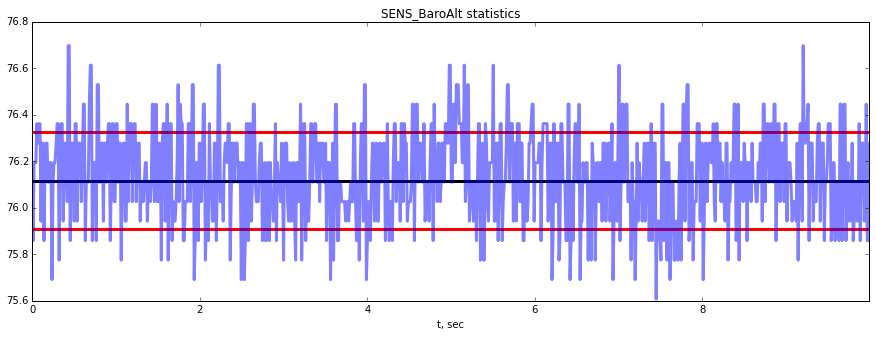

In [11]:
stats_ground = px4tools.statistics(data_ground, [
        'GPS_VelN', 'GPS_VelE', 'GPS_VelD',
        'GPS_X', 'GPS_Y', 'GPS_Z', 'DIST_Distance',
                        'IMU1_AccX', 'IMU1_AccY', 'IMU1_AccZ', 'SENS_BaroAlt'], plot=True)
stats_ground

{'DIST_Distance_dt': 0,
 'DIST_Distance_mean': 0,
 'DIST_Distance_noise_power': 0,
 'DIST_Distance_stddev': 0,
 'DIST_Distance_variance': 0,
 'GPS_VelD_dt': 0.1915912500000001,
 'GPS_VelD_mean': -0.10500000664963642,
 'GPS_VelD_noise_power': 0.0066388612207450067,
 'GPS_VelD_stddev': 0.18614825082847777,
 'GPS_VelD_variance': 0.034651171286501879,
 'GPS_VelE_dt': 0.1915912500000001,
 'GPS_VelE_mean': 0.082120003662988397,
 'GPS_VelE_noise_power': 0.0013509310741215514,
 'GPS_VelE_stddev': 0.083970890775261153,
 'GPS_VelE_variance': 0.0070511104975908385,
 'GPS_VelN_dt': 0.1915912500000001,
 'GPS_VelN_mean': 0.08256000369783599,
 'GPS_VelN_noise_power': 0.0026136255361285466,
 'GPS_VelN_stddev': 0.1167975806577895,
 'GPS_VelN_variance': 0.013641674847512844,
 'GPS_X_dt': 0.1915912500000001,
 'GPS_X_mean': -3.1691793302605218,
 'GPS_X_noise_power': 0.0059789689984892612,
 'GPS_X_stddev': 0.17665474830431521,
 'GPS_X_variance': 0.031206900098460957,
 'GPS_Y_dt': 0.1915912500000001,
 'GPS_

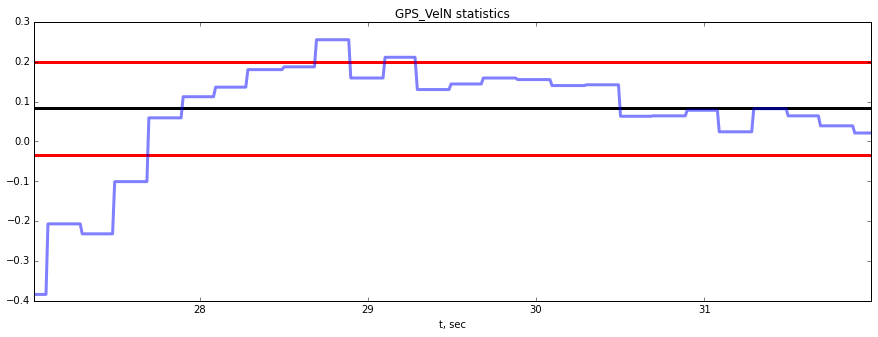

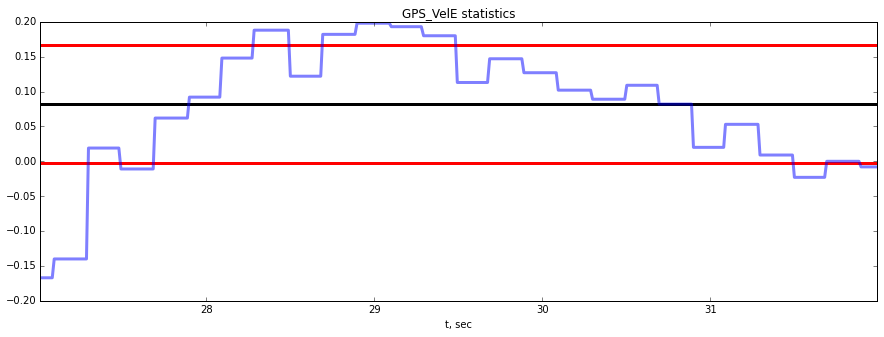

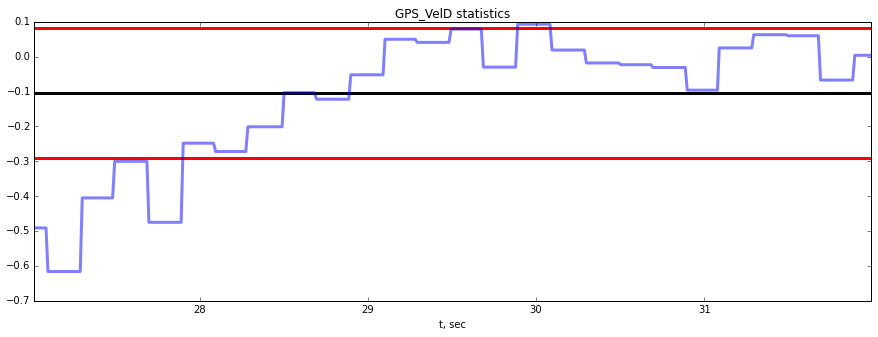

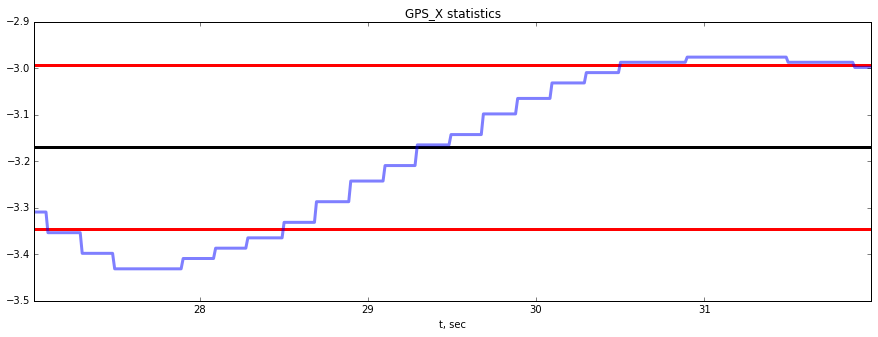

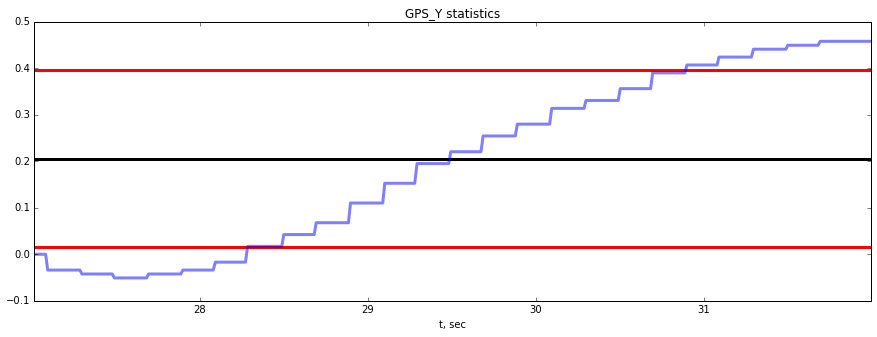

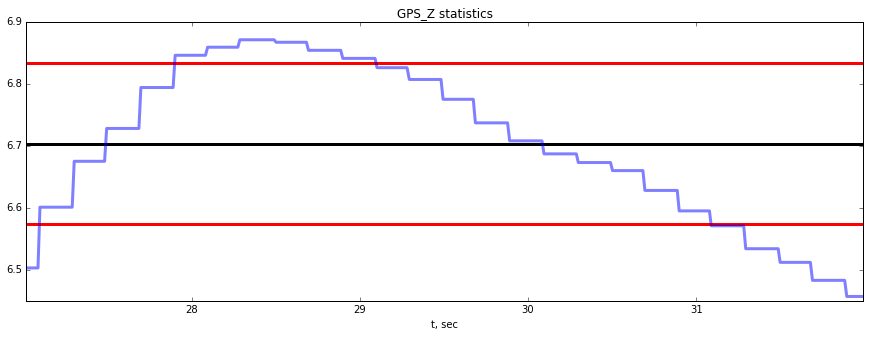

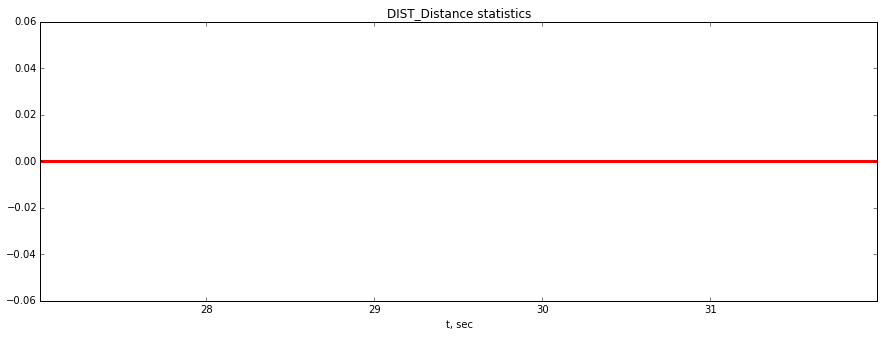

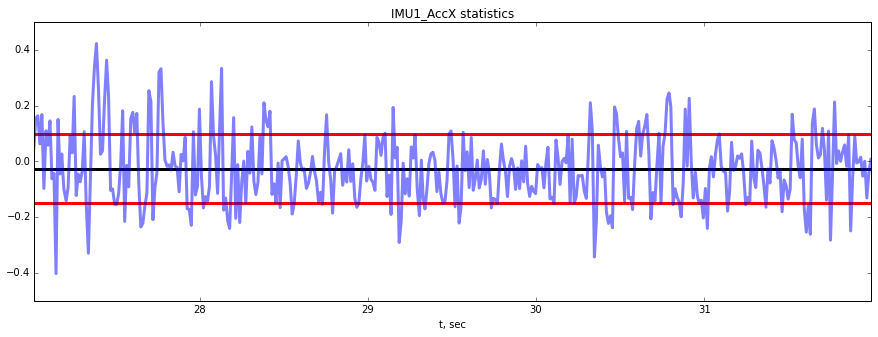

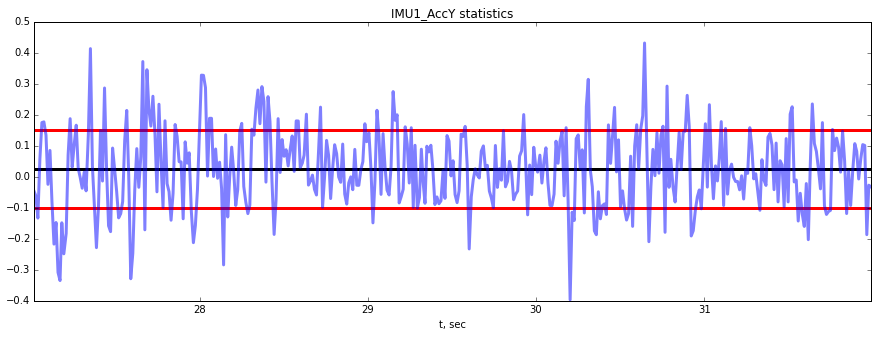

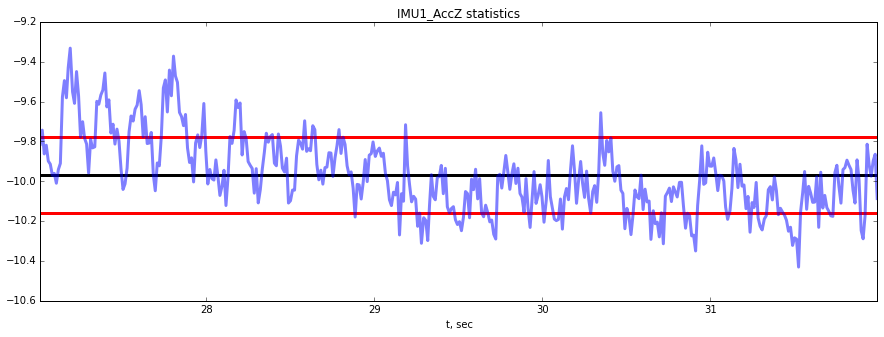

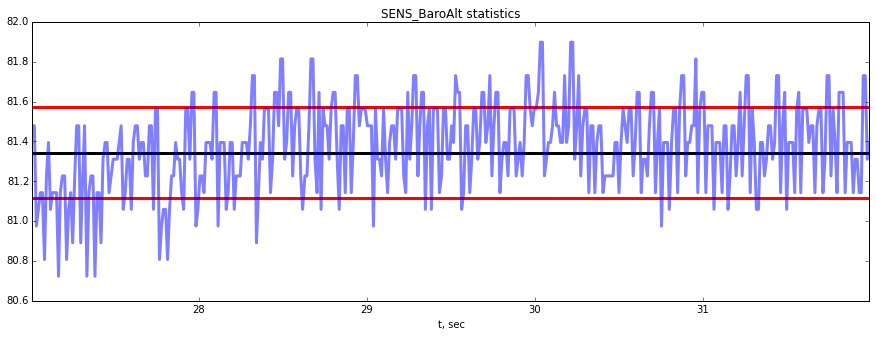

In [25]:
data_flight = data[27:32]
stats_flight = px4tools.statistics(data_flight, [
        'GPS_VelN', 'GPS_VelE', 'GPS_VelD',
        'GPS_X', 'GPS_Y', 'GPS_Z', 'DIST_Distance',
                        'IMU1_AccX', 'IMU1_AccY', 'IMU1_AccZ', 'SENS_BaroAlt'], plot=True)
stats_flight

In [26]:
res = px4tools.find_lpe_gains(data_ground, printing=True);

LPE_BAR_Z	=	0.208
LPE_GPS_XY	=	0.075
LPE_ACC_Z	=	3.24e-05
LPE_GPS_VXY	=	0.0275
LPE_ACC_XY	=	0.000207
LPE_LDR_Z	=	0
LPE_GPS_Z	=	0.391
LPE_GPS_VZ	=	0.0426


In [27]:
px4tools.find_lpe_gains(data_flight, printing=True);

LPE_BAR_Z	=	0.228
LPE_GPS_XY	=	0.19
LPE_ACC_Z	=	0.000439
LPE_GPS_VXY	=	0.117
LPE_ACC_XY	=	0.000185
LPE_LDR_Z	=	0
LPE_GPS_Z	=	0.13
LPE_GPS_VZ	=	0.186


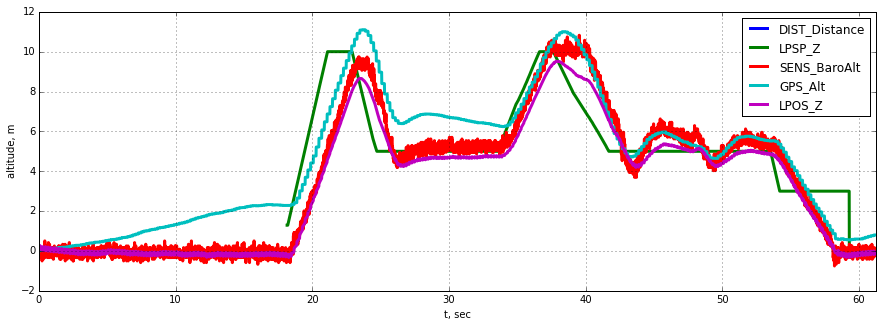

In [29]:
px4tools.alt_analysis(data);
pl.legend()

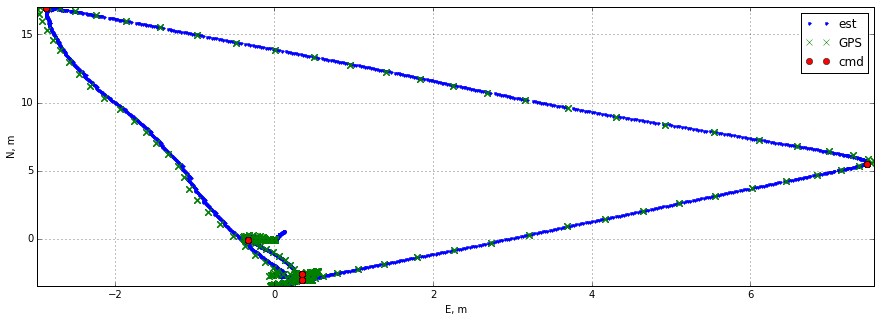

In [30]:
px4tools.pos_analysis(data);
pl.legend()

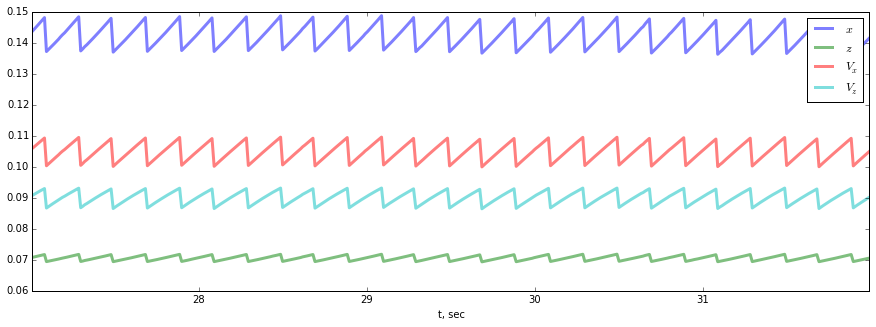

In [31]:
def plot_cov(data):
    pl.sqrt(data.EST2_P0).plot(label='$x$', alpha=0.5)
    #pl.sqrt(data.EST2_P1).plot(label='$y$')
    pl.sqrt(data.EST2_P2).plot(label='$z$', alpha=0.5)
    pl.sqrt(data.EST2_P3).plot(label='$V_x$', alpha=0.5)
    #pl.sqrt(data.EST2_P4).plot(label='$V_y$')
    pl.sqrt(data.EST2_P5).plot(label='$V_z$', alpha=0.5)
    pl.legend()
plot_cov(data_flight)

In [32]:
def cov_plot(state, cov, name=''):
    var = pl.sqrt(cov)
    mean = state.mean()
    (mean + var).plot(label='', style='--r')
    (mean-var).plot(label='', style='--r')
    state.plot()
def cov_analysis(data):
    cov_plot(data.EST0_s0, data.EST2_P0)
    cov_plot(data.EST0_s1, data.EST2_P1)
    cov_plot(data.EST0_s2, data.EST2_P2)
    pl.legend(loc='best')

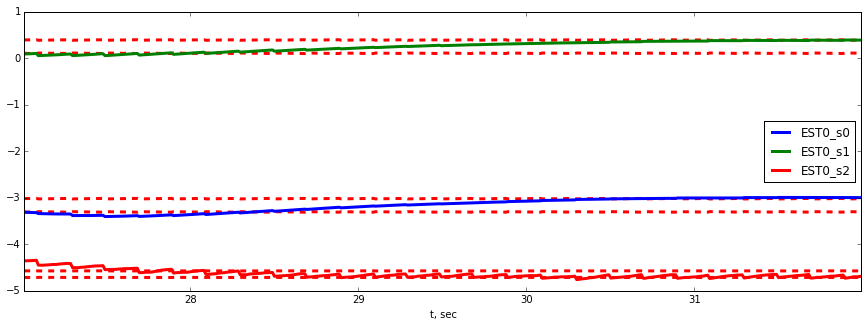

In [35]:
cov_analysis(data_flight)

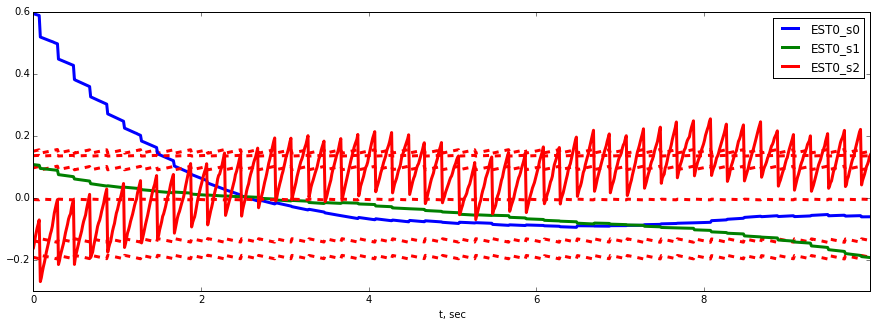

In [36]:
cov_analysis(data_ground)